<a href="https://colab.research.google.com/github/Hari8adro/Hari8adro/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# **Machine Learning Model Building Step**



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
df.shape

(161, 14)

In [5]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [6]:
df.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

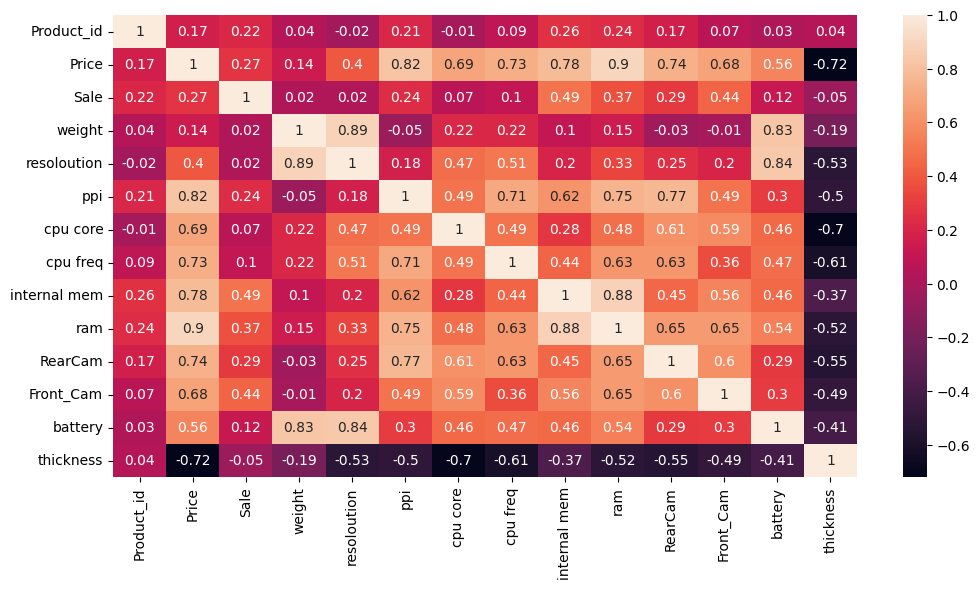

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().round(2),annot=True)

**Strong Positive Correlation:**
1.   Price and PPI : 0.82
2.   Price and internal mem : 0.78
3.   Price and RAM : 0.9
4.   Price and Rearcam : 0.74



In [9]:
corr = df.corr()
high_corr = corr[(corr.abs() > 0.7) & (corr.abs() < 1.0)]
high_corr.columns[high_corr.any()]

Index(['Price', 'weight', 'resoloution', 'ppi', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'battery', 'thickness'],
      dtype='object')

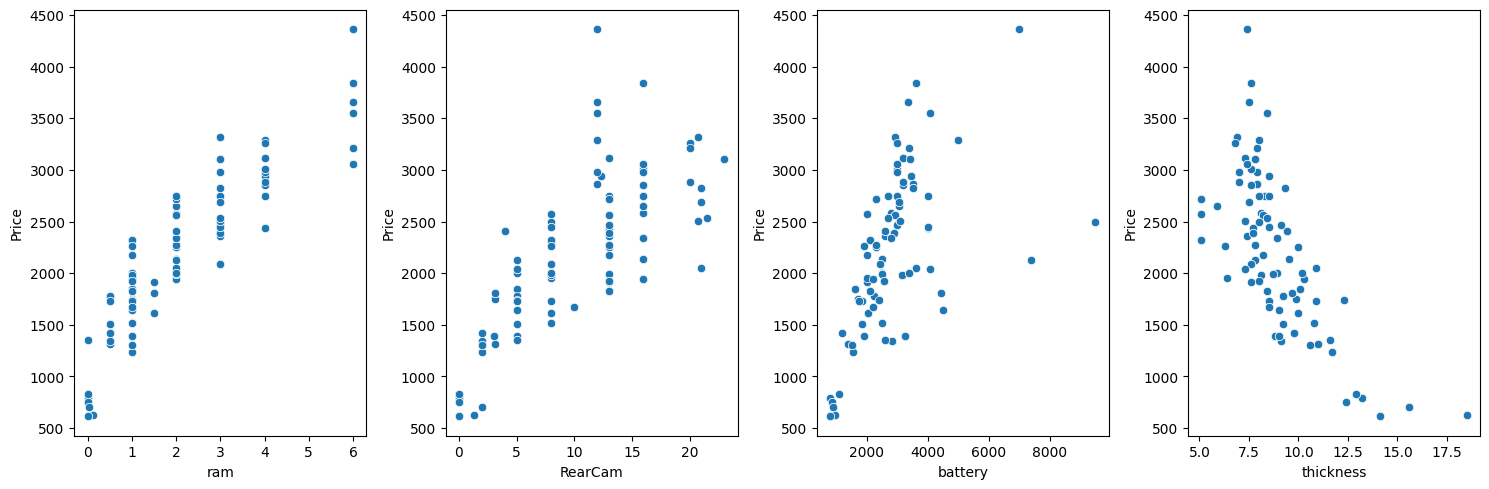

In [10]:
fig, axes = plt.subplots(ncols=4 , figsize=(15,5))

for index, col in enumerate(high_corr.columns[high_corr.any()].tolist()[6:]):
  sns.scatterplot(x=col, y='Price', data=df, ax=axes[index])

plt.tight_layout()
plt.show()

In [11]:
x = df.drop(columns=['Price'])
y = df['Price']

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

n=5
selector = SelectKBest(f_classif, k=n)
x_new = selector.fit_transform(x,y)

scores = selector.scores_

feature_score = pd.DataFrame({'Feature': x.columns, 'Score': scores}).sort_values(by='Score', ascending=False)
feature_score


,Feature,Score
11,battery,2927.366621
2,weight,1227.226949
9,RearCam,678.324324
3,resoloution,597.021802
7,internal mem,517.571834
4,ppi,411.204719
8,ram,333.895742
10,Front_Cam,133.128433
12,thickness,130.482720
5,cpu core,58.732143


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 123)

print(f"Dataset_shape: {df.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset_shape: (161, 14)
x_train shape: (128, 13)
x_test shape: (33, 13)
y_train shape: (128,)
y_test shape: (33,)


In [14]:
x_train.head()

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
135,301,616,183.0,5.0,294,4,1.30,32.0,3.0,8.0,5.0,4000,8.5
160,1131,9807,202.0,6.0,367,8,1.50,16.0,3.0,21.5,16.0,2700,8.4
41,907,37,147.0,5.0,294,4,1.30,32.0,3.0,8.0,5.0,2450,7.6
7,947,13,150.0,5.5,401,4,2.30,16.0,2.0,16.0,8.0,2500,9.5
104,133,208,142.0,5.0,440,8,1.25,16.0,2.0,16.0,8.0,2700,8.0


In [15]:
x = df[['ram']]
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 11)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
slope = model.coef_
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: [431.49959206]
Intercept: 1256.5096125036544


In [19]:
y_pred = model.predict(x_test)

In [20]:
result = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
result.head()

,Actual Price,Predicted Price
86,791,1258.235611
159,3211,3845.507165
52,2859,2982.507981
22,2977,2982.507981
51,1347,1477.437404


In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2_score = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5


print(f"R2_score: {R2_score}")
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")


R2_score: 0.8242085445875742
MAE: 255.64476262944623
MSE: 100783.74910900307
RMSE: 317.46456354844247


In [22]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [34]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [37]:
x = df.drop('Price', axis=1)
y = df['Price']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 34)

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
slope = model.coef_
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: [-1.19583875e-02 -1.81400783e-02 -6.46996007e-01 -8.59476046e+01
  1.06373137e+00  4.76647652e+01  1.61464105e+02  5.08132100e+00
  9.74581136e+01 -7.69885742e-01  1.44976728e+01  1.60407874e-01
 -6.90313950e+01]
Intercept: 1709.5635419945474


In [41]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2_score = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f"R2_score: {R2_score}")
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")

R2_score: 0.9005924021848024
MAE: 185.20503493168874
MSE: 51630.225774479586


# **Conclusion:**

  * After applying Multi-Linear Regression (MLR) with the features , the R² score of the model is approximately 0.9005.

  * This indicates that around 90% of the variance in the target variable 'Price' can be explained by the combined effects of the mobile price predictions.

  * This is a significant improvement over the simple linear regression model, where only 82% of the variance was explained by the 'RAM' feature alone.

  * The higher R² score suggests that incorporating additional features provides a more comprehensive for predicting 'Price'.

**Key Features:**

The correlation analysis helps identify which features are strongly related to the price. For example, features like ram or storage with high correlation to price are important predictors.
Strongly correlated features should be included in the model since they have a big impact on predicting price.

**Relationship Patterns:**

Scatter plots show how each feature relates to the price. If a feature has a clear upward trend with price (like ram), it means higher values of that feature generally result in a higher price.
If the scatter plot doesn’t follow a straight line, it suggests that the feature’s relationship with price might be more complex, and a simple linear model might not be the best choice.

**Outliers:**

Scatter plots also help spot outliers, which are data points far away from the rest. These outliers can affect the model’s accuracy, so they might need special attention or removal.



**prediction of mobile prices**:

 Each feature adds to the phone's perceived value, and the model uses these relationships to predict price. High values in these features typically result in higher predicted prices, as they align with what generally makes a phone more desirable or valuable.

In a linear regression model, the slope (coefficient) and intercept provide important insights about the relationship between features and the target variable (price):

**Slope (Coefficient):**

What It Means:
  
  The slope indicates how much the target variable (price) is expected to change for every one-unit increase in the feature.

**Interpretation:**

 * A positive slope means that as the feature increases, the price also increases.
 * A negative slope would mean that as the feature increases, the price decreases.
Intercept:

What It Means:

   The intercept is the predicted value of the target variable (price) when all features are equal to zero.
     
**Interpretation:**

  The intercept represents the starting point of the price prediction.

**Summary:**

The slope shows how much a feature impacts the price, while the intercept provides a starting point for price predictions. Together, they help understand the relationship between the features and mobile prices.

# **Discrepancies Between Predicted and Actual Values**:

**Analysis of Discrepancies:**

  * If you observe instances where predicted values are consistently higher or lower than actual prices, it might indicate a bias in the model. For example, if the model consistently underpredicts prices for high-end phones, this might suggest that it has not fully captured the features that differentiate premium devices.

 * Plotting predicted vs. actual values can reveal patterns. If the points are scattered closely around a 45-degree line, it indicates good predictions. If they diverge significantly, it suggests discrepancies.

**Summary of Model Performance**

**Overall Assessment:**

 * If the R² score is high, and MAE, MSE, and RMSE are low, the model is performing well. However, if any of these metrics indicate significant errors, or if visual inspection of predicted vs. actual values shows a clear pattern of discrepancies, it suggests areas for improvement.


* Depending on the performance metrics, you might want to refine the model further by adding features, trying different modeling techniques, or tuning hyperparameters to improve accuracy.

Feature Engineering:

Add new features that may influence price, such as camera quality, processor speed, or brand reputation.
Create interaction features that combine two or more existing features (e.g., RAM * Storage).

Try Different Models:

Use more complex models like Random Forest, Gradient Boosting, or Support Vector Machines, which can capture non-linear relationships better than linear regression.

Hyperparameter Tuning:

Optimize model settings using techniques like Grid Search or Random Search to find the best parameters for improved accuracy.

Handle Outliers:

Investigate and possibly remove outliers that can skew predictions, or use models robust to outliers.

Cross-Validation:

Use cross-validation techniques to ensure the model generalizes well to unseen data, reducing the chance of overfitting.

Regularization Techniques:

Implement Lasso or Ridge regression to reduce overfitting by penalizing complex models, which can help improve prediction accuracy.

Increase Data Quality:

Clean the dataset to remove duplicates, errors, and irrelevant features, or gather more data to enhance the training set.